## **Guessing Gender by Height and Weight**

note : this Machine Learning model inspired by **YouTube** channel names **indonesia_belajar**, and i modified this model with more data.

note : sorry if my English typing is bad, hopefully you guys can understand.

## **Import The Important Module**

import the module that we want to use for this research.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## **Import The Dataset**

import the dataset

note : this dataset is not truly true, and not 100% true guessing what's your gender, because the dataset is not complete at all, that's just Weight and Height, i made this dataset, and get the data from : https://kaltim.idntimes.com/health/fitness/viktor-yudha/tinggi-badan-ideal-orang-dewasa-regional-kaltim/7

you guys can check it.

In [10]:
data_df = pd.read_csv('/content/dataset.csv')
data_df.head()

,tinggi,jk,berat
0,140,wanita,44
1,141,wanita,44
2,142,wanita,44
3,143,wanita,45
4,144,wanita,45


## **Checking The Dataset**

we must check the data every time we want to make a model, because this is the important thing, if you suddenly meet a bad dataset, wether you want it or not, you must clean the dataset. since we use my dataset, i guarantee the data is 100% clean XD 

In [11]:
data_df.shape

(42, 3)

In [12]:
data_df.describe()

,tinggi,berat
count,42.000000,42.000000
mean,160.500000,53.166667
std,12.267844,7.802178
min,140.000000,44.000000
25%,150.250000,46.000000
50%,160.500000,50.500000
75%,170.750000,61.000000
max,181.000000,68.000000


In [13]:
data_df.keys()

Index(['tinggi', 'jk', 'berat'], dtype='object')

## **Visualize  The Data**

the first think we have to do is visualize the data, because from there we can choose which way is good to this dataset.

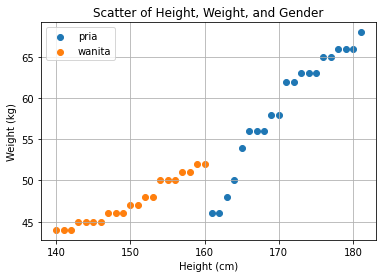

In [17]:
fig, ax = plt.subplots()

for jk, d in data_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Scatter of Height, Weight, and Gender')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

## **Classification with KNN**

since the data is look good and nice if we use KNN, then we use KNN for this model.

In [31]:
X = np.array(data_df[['tinggi', 'berat']])
y = np.array(data_df['jk'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y ,random_state=1)

print(f'X_train :\n{X_train.shape}\nX_test : {X_test.shape}\nX : {X.shape}')
print(f'y_train : {y_train.shape}\ny_test : {y_test.shape}\ny : {y.shape}\n')
print(f'features :\n{X_train}\n')
print(f'labels :\n{y_train}')

X_train :
(37, 2)
X_test : (5, 2)
X : (42, 2)
y_train : (37,)
y_test : (5,)
y : (42,)

features :
[[160  52]
 [150  47]
 [156  50]
 [176  65]
 [155  50]
 [152  48]
 [177  65]
 [157  51]
 [149  46]
 [161  46]
 [167  56]
 [151  47]
 [146  45]
 [164  50]
 [169  58]
 [141  44]
 [180  66]
 [166  56]
 [178  66]
 [143  45]
 [175  63]
 [181  68]
 [142  44]
 [162  46]
 [168  56]
 [140  44]
 [148  46]
 [179  66]
 [153  48]
 [159  52]
 [170  58]
 [145  45]
 [171  62]
 [174  63]
 [165  54]
 [147  46]
 [163  48]]

labels :
['wanita' 'wanita' 'wanita' 'pria' 'wanita' 'wanita' 'pria' 'wanita'
 'wanita' 'pria' 'pria' 'wanita' 'wanita' 'pria' 'pria' 'wanita' 'pria'
 'pria' 'pria' 'wanita' 'pria' 'pria' 'wanita' 'pria' 'pria' 'wanita'
 'wanita' 'pria' 'wanita' 'wanita' 'pria' 'wanita' 'pria' 'pria' 'pria'
 'wanita' 'pria']


as we see in the output above, the feature is very good and ready to rock n roll, but the ***labels/target*** is not good since we want to predict the weight and the height later, then we must change the ***labels/target*** with ***LabelBinarizer***.

In [27]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train :\n{y_train}')

y_train :
[[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]]


the output above looks nice, but if we want to use the label for model, we have to change the shape of ***y_train*** to be flat, since we want to change the ***y_train*** to be flat, we can use ***flatten()*** function for this case.

In [28]:
y_train = y_train.flatten()
print(f'y_train : {y_train}')

y_train : [1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0]


## **Training KNN Classification Model**

training the data with K Nearest Neighbors Classifier.

In [32]:
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## **Prediction and See The Accuracy**

as you guys can see, i'm using ***classification_report***, because this function have a good and complete accuracy from every single accuracy on this ***sklearn.metrics*** modul

In [33]:
y_pred = model.predict(X_test)
y_pred

array(['pria', 'wanita', 'pria', 'wanita', 'wanita'], dtype=object)

In [35]:
cls_report = classification_report(y_test, y_pred)

print(f'Classification Report : \n{cls_report}')

Classification Report : 
              precision    recall  f1-score   support

        pria       1.00      1.00      1.00         2
      wanita       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



## **Making A Predictive System**

In [42]:
input_data = (150, 48) # input your height and weight here

# Changing the data type to numpy array
change_input = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one instance
reshape_array = change_input.reshape(1, -1)

prediction = model.predict(reshape_array)
print(prediction)

if(prediction == [0]):
    print('The Gender is Male')
else:
    print('The Gender is Female')

['wanita']
The Gender is Female


# **Going Fine and Nice.**